# MySQL Data Elements QMB400

### Sources:

https://medium.com/@tattwei46/how-to-use-python-with-mysql-79304bee8753

### Connecting to MySQL database

In [82]:
#import MySQl Libaries
import mysql.connector
# Import Data Libaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



In [83]:
# Check connection to MySQL DB
db_connection = mysql.connector.connect(
  host="localhost",
  user="root",
  password="*******",
  database="data_elements_class"
)

print(db_connection)

In [84]:
# Create Cursor object  
db_cursor = db_connection.cursor()

In [85]:
# select my schema table
sql = "SELECT * FROM data_elements_class.airport_data_mod_4"
db_cursor.execute(sql)

myresult = db_cursor.fetchone()

for x in myresult:
  print(x)



40511702
NOTARO RESTAURANT
ABE
635
Italian
15/06/2015
Violations were cited in the following area(s).
02B
Hot food item not held at or above 140Âº F.
Critical
30


28/08/2017
Cycle Inspection / Initial Inspection


In [86]:

print(db_connection)

### Importing MySQL for Preporccessing

In [88]:
# Import MySQL into a dataframe
import mysql.connector as sql
import pandas as pd

db_connection = sql.connect(host='localhost', database='data_elements_class', user='root', password='Sp111579')

db_cursor = db_connection.cursor()

db_cursor.execute('SELECT * FROM airport_data_mod_4')

table_rows = db_cursor.fetchall()

df = pd.DataFrame(table_rows)

df = pd.read_sql('SELECT * FROM airport_data_mod_4', con=db_connection)

In [90]:
# Print head of MySQL database

print(df.head(5))

      CAMIS                      DBA AIRPORT BUILDING CUISINE DESCRIPTION  \
0  40511702        NOTARO RESTAURANT     ABE      635             Italian   
1  40511702        NOTARO RESTAURANT     ABE      635             Italian   
2  50046354                 VITE BAR     ABE     2507             Italian   
3  50061389  TACK'S CHINESE TAKE OUT     ABE      11C             Chinese   
4  41516263               NO QUARTER     ABE     8015            American   

  INSPECTION DATE                                           ACTION  \
0      15/06/2015  Violations were cited in the following area(s).   
1      25/11/2014  Violations were cited in the following area(s).   
2       3/10/2016  Violations were cited in the following area(s).   
3      17/05/2017  Violations were cited in the following area(s).   
4      30/03/2017  Violations were cited in the following area(s).   

  VIOLATION CODE                              VIOLATION DESCRIPTION  \
0            02B        Hot food item not hel

In [91]:
print(df.isnull())
#show null values

       CAMIS    DBA  AIRPORT  BUILDING  CUISINE DESCRIPTION  INSPECTION DATE  \
0      False  False    False     False                False            False   
1      False  False    False     False                False            False   
2      False  False    False     False                False            False   
3      False  False    False     False                False            False   
4      False  False    False     False                False            False   
5      False  False    False     False                False            False   
6      False  False    False     False                False            False   
7      False  False    False     False                False            False   
8      False  False    False     False                False            False   
9      False  False    False     False                False            False   
10     False  False    False     False                False            False   
11     False  False    False     False  

In [93]:
print(df.isnull().sum())
#counts all null values in each column

CAMIS                       0
DBA                         0
AIRPORT                  9309
BUILDING                    0
CUISINE DESCRIPTION         0
INSPECTION DATE             0
ACTION                      0
VIOLATION CODE              0
VIOLATION DESCRIPTION       0
CRITICAL FLAG               0
SCORE                       0
GRADE                       0
GRADE DATE                  0
RECORD DATE                 0
INSPECTION TYPE             0
dtype: int64


In [94]:
# Get inference data from columns
print(df.DBA.describe())

count              67283
unique             17105
top       DUNKIN' DONUTS
freq                 736
Name: DBA, dtype: object


SyntaxError: EOL while scanning string literal (<ipython-input-95-e8cbfb693525>, line 1)

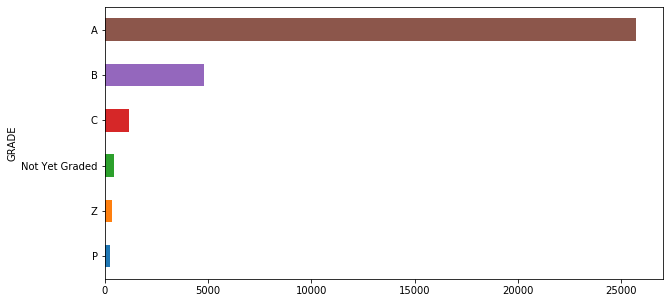

In [198]:
gp = df.groupby(by=['GRADE'])
dba_avg = gp.mean()
dba_ct = gp.count()
# print(dba_ct)
dba_ct.iloc[1:10, 1].sort_values( ascending=True).plot(figsize=(10,5), kind='barh')

In [192]:
tgrouped=df.groupby(['DBA']).count()


In [193]:
test=tgrouped.sort_values(by='AIRPORT', ascending=False)[:10]

In [194]:
test2 =test.groupby(['AIRPORT']).max(min_count=- 1)

NameError: name 'ax' is not defined

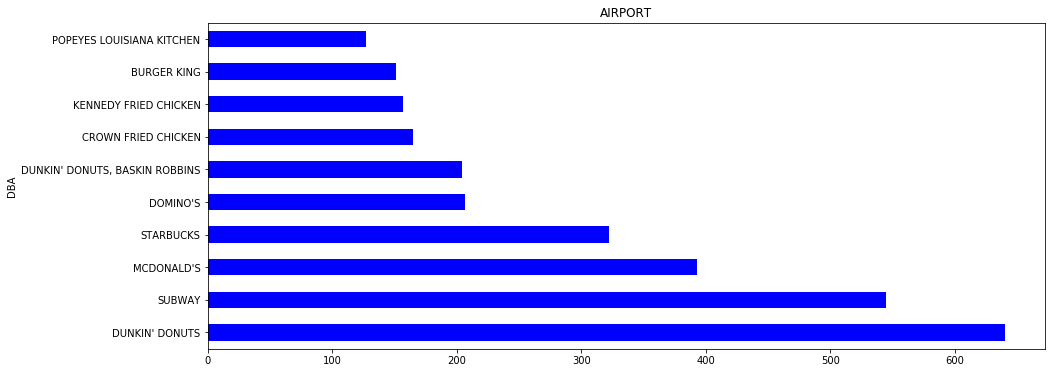

In [196]:
test['AIRPORT'].plot(kind='barh', stacked=False, figsize=[15,6], colormap='winter',  style='g',  subplots=True) 
ax.invert_xaxis()